In [2]:

import Hawkes as hk

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Assuming df is your dataset
df = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')


conflicts_by_year =  df.groupby(['year']).size().reset_index(name='conflict_count')
conflicts_by_year_np = conflicts_by_year.to_numpy().astype(int)

conflicts_timestamp = []
for year in conflicts_by_year_np:
    conflicts_timestamp.append(np.linspace(year[0],year[0]+1,year[1]+2)[1:-1])


conflicts_timestamp = np.concatenate(conflicts_timestamp)
print(conflicts_timestamp)

[1090.5        1137.5        1142.33333333 ... 1890.5        1890.66666667
 1890.83333333]


C:\Users\Windows\AppData\Local\Temp\ipykernel_28776\3153821481.py:2: DtypeWarning: Columns (14,20,34,37,39,41,43,45,46,47,48,49,50,51,52,53,54,55,57,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')


In [19]:
conflicts_timestamp_1k = conflicts_timestamp - 1000
conflicts_timestamp_1k.shape

(20950,)

In [5]:
best_mu = 0.5197
best_k = 2.8339
best_p = 3.3858
best_c = 1.1140

In [6]:
simulation1 = hk.simulator()
simulation1.set_kernel('pow')
simulation1.set_baseline('const')
para = {'mu':best_mu, 'k':best_k, 'p':best_p, 'c':best_c}
simulation1.set_parameter(para)

In [13]:
itv = [800,890] # the observation interval
T = simulation1.simulate(itv)

In [15]:
mu = 0.0460
k = 2.1891
p = 2.2877 
c = 1.5234

simulation2 = hk.simulator()
simulation2.set_kernel('pow')
simulation2.set_baseline('const')
para = {'mu':mu, 'k':k, 'p':p, 'c':c}
simulation2.set_parameter(para)

In [16]:
mu = 0.0651
k = 2.7777
p =  2.5714
c = 1.4239

simulation3 = hk.simulator()
simulation3.set_kernel('pow')
simulation3.set_baseline('const')
para = {'mu':mu, 'k':k, 'p':p, 'c':c}
simulation3.set_parameter(para)

In [31]:
model4 = hk.estimator()
model4.set_kernel('exp')
model4.set_baseline('const',)

itv = [0,1000] # the observation interval
model4.fit(conflicts_timestamp_1k,itv) # T is the event times (numpy.ndarray)
print("parameter:",model4.parameter) # the estimated parameter values
print("branching ratio:",model4.br) # the branching ratio
print("log-likelihood:",model4.L) # the log-likelihood of the estimated parameter values
print("AIC:",model4.AIC) # the AIC of the estimated parameter values

parameter: {'mu': 0.26702545279571765, 'alpha': 0.9872541553091945, 'beta': 3.7410842762563994}
branching ratio: 0.9872541553091945
log-likelihood: 76188.93828021841
AIC: -152371.87656043682


In [34]:
mu = 0.2670
a = 0.9873
b = 3.7411

simulation4 = hk.simulator()
simulation4.set_kernel('exp')
simulation4.set_baseline('const')
para = {'mu':mu, 'alpha':a, 'beta':b}
simulation4.set_parameter(para)

In [36]:
mu = 0.4215
a = 0.7847
b = 2.5731

simulation5 = hk.simulator()
simulation5.set_kernel('exp')
simulation5.set_baseline('const')
para = {'mu':mu, 'alpha':a, 'beta':b}
simulation5.set_parameter(para)

In [37]:
mu = 1.7956
a = 0.9277
b = 1.8325

simulation6 = hk.simulator()
simulation6.set_kernel('exp')
simulation6.set_baseline('const')
para = {'mu':mu, 'alpha':a, 'beta':b}
simulation6.set_parameter(para)

In [38]:
mu = 5.7734
a = 0.944
b = 6.3306

simulation7 = hk.simulator()
simulation7.set_kernel('exp')
simulation7.set_baseline('const')
para = {'mu':mu, 'alpha':a, 'beta':b}
simulation7.set_parameter(para)

In [102]:
result = []
itv = [800,890]
models = [simulation1,simulation2, simulation3, simulation4,simulation5,simulation6,simulation7]
for i in range(len(models)):
    result.append(models[i].simulate(itv))

Text(0, 0.5, 'Number of Confilicts')

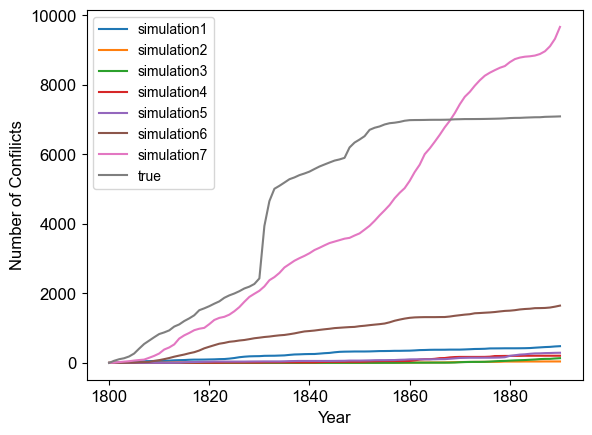

In [151]:
names = ["simulation1","simulation2","simulation3","simulation4","simulation5","simulation6","simulation7"]


for k in range(len(models)):
    y = []
    for i in np.linspace(800,890,91):
        nn = sum(j <= i for j in result[k])
        y.append(nn)
    plt.plot(np.linspace(1800,1890,91),y, label =names[k] )

y = []
for i in np.linspace(800,890,91):

    nn = sum(j <= i for j in conflicts_timestamp_1k) - sum(j <= 800 for j in conflicts_timestamp_1k)
    y.append(nn)
plt.plot(np.linspace(1800,1890,91),y, label ="true" )

plt.legend(fontsize=10)
plt.xlabel('Year')
plt.ylabel('Number of Confilicts')



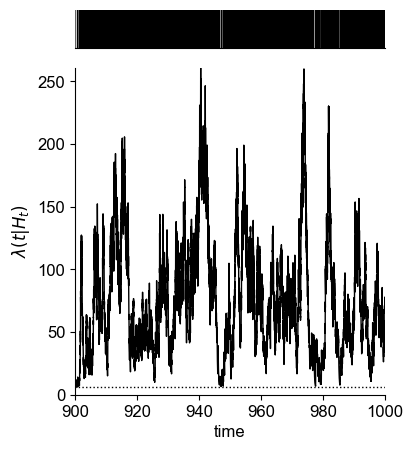

In [145]:
itv2 = [900,1000]
T_simulation_900 = simulation7.simulate(itv2)
simulation7.plot_l()

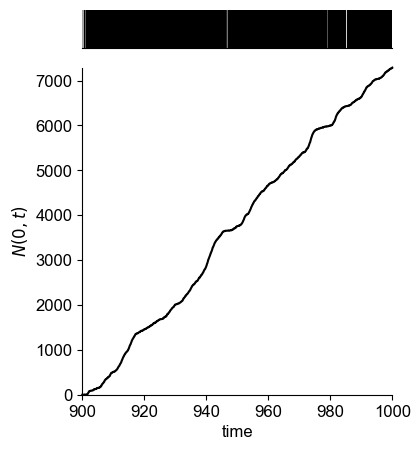

In [147]:
simulation7.plot_N()


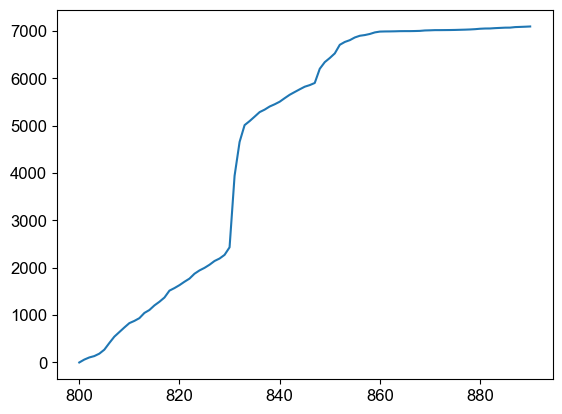

In [141]:
y = []
for i in np.linspace(800,890,91):

    nn = sum(j <= i for j in conflicts_timestamp_1k) - sum(j <= 800 for j in conflicts_timestamp_1k)
    y.append(nn)
plt.plot(np.linspace(800,890,91),y, label ="true" )

In [124]:
y = []
for i in np.linspace(800,890,91):
    nn = sum(j <= i for j in result[0])
    y.append(nn)
    

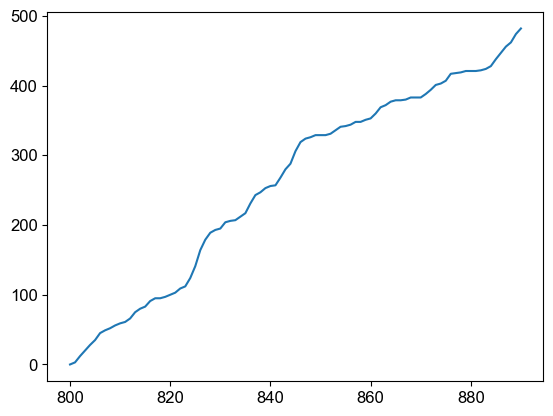

In [127]:
plt.plot(np.linspace(800,890,91),y)

In [51]:
mu = np.array([2.65478064e-08, 1.61909050e-01, 1.16239234e+00, 4.06561141e-01,7.49018144e-02, 2.71310453e-07])

def plinear(x, mu):
    if x <= 200:
        y = ((mu[1]/mu[0]) / (200)) * x + mu[0]
    if x > 200 and x <= 400:
        y = ((mu[2]/mu[1]) / (200)) * (x-200) + mu[1]
    if x > 400 and x <= 600:
        y = ((mu[3]/mu[2]) / (200)) * (x-200) + mu[2]
    if x > 600 and x <= 800:
        y = ((mu[4]/mu[3]) / (200)) * (x-200) + mu[3]
    if x > 800:
        y = ((mu[5]/mu[4]) / (200)) * (x-200) + mu[4]
    
    return y


1.8042063541348488

In [50]:
100<= 100

True

In [70]:
mu = np.array([2.65478064e-08, 1.61909050e-01, 1.16239234e+00, 4.06561141e-01,7.49018144e-02, 2.71310453e-07])
a = 0.9825
b = 3.8179
def plinear(x, mu):
    if x <= 200:
        y = ((mu[1]-mu[0]) / (200)) * x + mu[0]
    if x > 200 and x <= 400:
        y = ((mu[2]-mu[1]) / (200)) * (x-200) + mu[1]
    if x > 400 and x <= 600:
        y = ((mu[3]-mu[2]) / (200)) * (x-200) + mu[2]
    if x > 600 and x <= 800:
        y = ((mu[4]-mu[3]) / (200)) * (x-200) + mu[3]
    if x > 800:
        y = ((mu[5]-mu[4]) / (200)) * (x-200) + mu[4]
    return y
mu_t = lambda x: plinear(x, mu) # baseline function


simulation8 = hk.simulator()
simulation8.set_kernel('exp')
simulation8.set_baseline('custom',l_custom=mu_t)
para = {'alpha':a, 'beta':b}
simulation8.set_parameter(para)

In [96]:
mu = np.array([2.65478064e-08, 1.61909050e-01, 1.16239234e+00, 4.06561141e-01,7.49018144e-02, 2.71310453e-07])
a = 0.9825
b = 3.8179

mu_t = lambda x: model8.baseline.l(x)[0] # baseline function


simulation8 = hk.simulator()
simulation8.set_kernel('exp')
simulation8.set_baseline('custom',l_custom = mu_t)
para = {'alpha':a, 'beta':b}
simulation8.set_parameter(para)

In [95]:
mu_t(0)[0]

2.6547806361926933e-08

In [97]:

T = simulation8.simulate(itv)


In [98]:
T

array([], dtype=float64)

In [ ]:
simulation = hk.simulator()
simulation.set_kernel('exp')
simulation.set_baseline('const')
para = {'mu':mu, 'alpha':a, 'beta':b}
simulation.set_parameter(para)

In [86]:
model8 = hk.estimator()
model8.set_kernel('exp')
model8.set_baseline('plinear',num_basis=6)

itv = [0,1000] # the observation interval
model8.fit(conflicts_timestamp_1k,itv) # T is the event times (numpy.ndarray)
print("parameter:",model8.parameter) # the estimated parameter values
print("branching ratio:",model8.br) # the branching ratio
print("log-likelihood:",model8.L) # the log-likelihood of the estimated parameter values
print("AIC:",model8.AIC) # the AIC of the estimated parameter values

parameter: {'mu': array([2.65478064e-08, 1.61909050e-01, 1.16239234e+00, 4.06561141e-01,
       7.49018144e-02, 2.71310453e-07]), 'alpha': 0.982496410875322, 'beta': 3.871866941849846}
branching ratio: 0.982496410875322
log-likelihood: 76257.69285648252
AIC: -152509.38571296504


In [85]:
x =np.linspace(0,100,1000)
print(model8.baseline.l(x))

[2.65478064e-08 8.10620953e-05 1.62097643e-04 2.43133190e-04
 3.24168738e-04 4.05204285e-04 4.86239833e-04 5.67275380e-04
 6.48310928e-04 7.29346475e-04 8.10382023e-04 8.91417570e-04
 9.72453118e-04 1.05348867e-03 1.13452421e-03 1.21555976e-03
 1.29659531e-03 1.37763086e-03 1.45866640e-03 1.53970195e-03
 1.62073750e-03 1.70177305e-03 1.78280859e-03 1.86384414e-03
 1.94487969e-03 2.02591524e-03 2.10695078e-03 2.18798633e-03
 2.26902188e-03 2.35005743e-03 2.43109297e-03 2.51212852e-03
 2.59316407e-03 2.67419962e-03 2.75523516e-03 2.83627071e-03
 2.91730626e-03 2.99834181e-03 3.07937735e-03 3.16041290e-03
 3.24144845e-03 3.32248400e-03 3.40351954e-03 3.48455509e-03
 3.56559064e-03 3.64662619e-03 3.72766173e-03 3.80869728e-03
 3.88973283e-03 3.97076838e-03 4.05180392e-03 4.13283947e-03
 4.21387502e-03 4.29491057e-03 4.37594611e-03 4.45698166e-03
 4.53801721e-03 4.61905276e-03 4.70008830e-03 4.78112385e-03
 4.86215940e-03 4.94319495e-03 5.02423049e-03 5.10526604e-03
 5.18630159e-03 5.267337